#CASO 4. MARZO

In [1]:
#!pip install elasticsearch
#!pip install eland
#!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 385 kB 5.0 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 140 kB 45.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 143 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

In [2]:
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "9QJVpAsI1dfU33vZpc072VTd"

# Found in the 'Manage Deployment' page
CLOUD_ID = "SeriestemporalesElastic:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQxMmRiODkwZjhhN2U0YTVjOTAwMDViODMyZjhlYWViNCRjMmU4YmQxYjkzZTI0MGY5OTZiYzIyNTFkZGMxMGY4Yg=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)

# Modificar fechas
#df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)

# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-08-01 00:00:00']
#df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)

# Modificar fechas y nombres para caso
df_final_marzo_caso4 = df_final_final.loc['2022-02-28 00:00:00':'2022-08-01 00:00:00']
#df_final_marzo_caso4 = df_final_final.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_final_marzo_caso4["anomalia_detect"] = df_final_marzo_caso4.anomaly_score_y > 0.0
df_final_marzo_caso4
df_final_marzo_caso4.to_csv("caso4_anomalias_marzo.csv")

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_anom_real = pd.read_csv("/content/caso4_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
#df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-08-01 00:00:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
timestamp,,,,,,,,
2022-03-01 00:50:00,5,458.746578,442.905487,463.215648,422.595326,False,366.997262,True
2022-03-01 01:00:00,6,474.611325,457.821625,478.131786,437.511464,False,379.689060,True
2022-03-01 01:10:00,7,490.286448,472.847717,493.157878,452.537556,False,392.229159,True
2022-03-01 01:20:00,8,505.742109,487.923279,508.233440,467.613118,False,404.593687,True
2022-03-01 01:30:00,9,520.948886,502.974213,523.284374,482.664052,False,416.759108,True
...,...,...,...,...,...,...,...,...
2022-03-31 23:10:00,4459,238.221810,241.987228,262.297389,221.677068,False,238.221810,False
2022-03-31 23:20:00,4460,251.086206,254.110977,274.421138,233.800816,False,251.086206,False
2022-03-31 23:30:00,4461,264.043717,265.939301,286.249461,245.629140,False,264.043717,False


In [ ]:
df_final_marzo_caso4["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_marzo_caso4

ValueError: ignored

In [ ]:
fp = df_final_marzo_caso4[(df_final_marzo_caso4.anomalia_detect == 1) & (df_final_marzo_caso4.anomalia_real == 0)]
fn = df_final_marzo_caso4[(df_final_marzo_caso4.anomalia_detect == 0) & (df_final_marzo_caso4.anomalia_real == 1)]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso4.index, y=df_final_marzo_caso4["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso4.index, y=df_final_marzo_caso4["actual"],
                    mode='lines',
                    name='Valores Actuales'))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso4[df_final_marzo_caso4["anomalia_real"]==True].index, y=df_final_marzo_caso4[df_final_marzo_caso4["anomalia_real"]==True].actual,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.show()

In [ ]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso4.actual, df_final_marzo_caso4.model_median))

Mean Absolute Error (MAE): 25.990426
Mean Squared Error (MSE): 7984.859595
Root Mean Squared Error (RMSE): 89.358042


In [ ]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect))

Número de anomalías reales:  427
Número de anomalías detectadas:  324
Accuracy: 0.901093
F1-Score: 0.505992


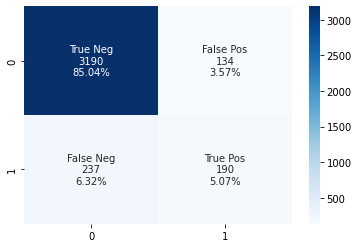

In [ ]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso4_marzo.png")

In [ ]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower)/np.median(df_final_marzo_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso4.model_upper-df_final_marzo_caso4.model_lower))

Amplitud de Intervalo de Confianza: 23.777344
Porcentaje Intervalo de Confianza respecto y: 5.220937 
Cuánto de desvía el Intervalo de Confianza: 18.820526


#CASO 4. JULIO

In [ ]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso4_accuracy")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso4 = df_final_final.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_final_julio_caso4["anomalia_detect"] = df_final_julio_caso4.anomaly_score_y > 0.0
df_final_julio_caso4.to_csv("caso4_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_anom_real = pd.read_csv("/content/caso4_julio.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,5,464.068554,459.550507,471.562749,447.538265,False,371.254843,True
2022-07-01 01:00:00,6,479.873264,475.068512,487.080754,463.056270,False,383.898611,True
2022-07-01 01:10:00,7,495.478333,490.302185,502.314427,478.289943,False,396.382666,True
2022-07-01 01:20:00,8,510.854056,505.234741,517.246983,493.222499,False,408.683245,True
2022-07-01 01:30:00,9,525.971164,519.854980,531.867223,507.842738,False,420.776931,True
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,4459,242.509813,242.248047,254.260289,230.235805,False,242.509813,False
2022-07-31 23:20:00,4460,255.408067,255.478241,267.490483,243.465999,False,255.408067,False
2022-07-31 23:30:00,4461,268.391208,268.905334,280.917577,256.893092,False,268.391208,False


In [ ]:
df_final_julio_caso4["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_julio_caso4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y,anomalia_detect,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,556.882265,caso4_accuracy,437.097506,455.675406,474.545184,8.391963,True,True
2022-07-01 01:00:00,575.847916,caso4_accuracy,452.116955,470.489454,489.156353,8.844329,True,True
2022-07-01 01:10:00,594.574,caso4_accuracy,466.880191,485.056873,503.531204,9.774396,True,True
2022-07-01 01:20:00,613.024868,caso4_accuracy,481.307687,499.385713,517.768059,10.235951,True,True
2022-07-01 01:30:00,631.165397,caso4_accuracy,495.353492,513.451265,531.864334,10.444108,True,True
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,242.509813,caso4_accuracy,117.180518,226.302371,335.424223,0.000000,False,False
2022-07-31 23:20:00,255.408067,caso4_accuracy,131.327679,239.524390,347.721101,0.000000,False,False
2022-07-31 23:30:00,268.391208,caso4_accuracy,144.610400,251.694158,358.777917,0.000000,False,False


In [ ]:
fp = df_final_julio_caso4[(df_final_julio_caso4.anomalia_detect == 1) & (df_final_julio_caso4.anomalia_real == 0)]
fn = df_final_julio_caso4[(df_final_julio_caso4.anomalia_detect == 0) & (df_final_julio_caso4.anomalia_real == 1)]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_julio_caso4.index, y=df_final_julio_caso4["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso4.index, y=df_final_julio_caso4["actual"],
                    mode='lines',
                    name='Valores Actuales'))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso4[df_final_julio_caso4["anomalia_real"]==True].index, y=df_final_julio_caso4[df_final_julio_caso4["anomalia_real"]==True].actual,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.show()

In [ ]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso4.actual, df_final_julio_caso4.model_median))

Mean Absolute Error (MAE): 58.128058
Mean Squared Error (MSE): 8077.772447
Root Mean Squared Error (RMSE): 89.876429


In [ ]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso4.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect))

Número de anomalías reales:  427
Número de anomalías detectadas:  300
Accuracy: 0.942812
F1-Score: 0.649243


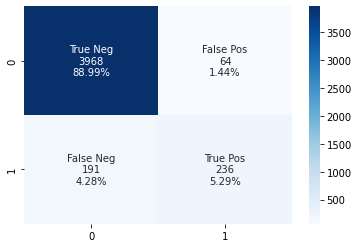

In [ ]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso4.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso4_julio.png")

In [ ]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower)/np.median(df_final_julio_caso4.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso4.model_upper-df_final_julio_caso4.model_lower))

Amplitud de Intervalo de Confianza: 249.110309
Porcentaje Intervalo de Confianza respecto y: 72.516572 
Cuánto de desvía el Intervalo de Confianza: 121.017349


#CASO 2. MARZO

In [31]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "9QJVpAsI1dfU33vZpc072VTd"

# Found in the 'Manage Deployment' page
CLOUD_ID = "SeriestemporalesElastic:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQxMmRiODkwZjhhN2U0YTVjOTAwMDViODMyZjhlYWViNCRjMmU4YmQxYjkzZTI0MGY5OTZiYzIyNTFkZGMxMGY4Yg=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()


In [32]:
df_final

,actual,job_id,model_lower,model_median,model_upper
timestamp,,,,,
2022-02-28 00:00:00,417.619932,lunes-anomalias,409.996179,419.959962,429.923744
2022-02-28 00:10:00,431.414534,lunes-anomalias,424.757499,434.030914,443.304329
2022-02-28 00:20:00,445.016081,lunes-anomalias,438.637488,447.411242,456.184997
2022-02-28 00:30:00,458.398679,lunes-anomalias,451.823306,460.262745,468.702184
2022-02-28 00:40:00,471.536854,lunes-anomalias,464.577958,472.678242,480.778526
...,...,...,...,...,...
2022-03-27 01:10:00,986.989612,lunes-anomalias,457.884263,465.098490,473.614168
2022-03-27 01:20:00,1006.328025,lunes-anomalias,468.575175,476.029649,484.889890
2022-03-27 01:30:00,1024.89294,lunes-anomalias,478.720983,486.502504,495.833663


In [43]:
df_score.loc["2022-03-07 00:10:00"]

anomaly_score    49.52631
Name: 2022-03-07 00:10:00, dtype: float64

In [14]:
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')

In [10]:
df_final_final.loc["2022-03-07 06:30:00"]

actual                  950.827424
job_id             lunes-anomalias
model_lower             629.153904
model_median            633.728376
model_upper             638.370893
anomaly_score_x                  0
anomaly_score_y           73.76087
Name: 2022-03-07 06:30:00, dtype: object

In [15]:
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])

In [18]:
df_final_final.loc["2022-03-07 22:50:00"]

actual                  477.310454
job_id             lunes-anomalias
model_lower             316.312874
model_median            327.163016
model_upper             341.065435
anomaly_score_y          56.413904
Name: 2022-03-07 22:50:00, dtype: object

In [21]:
df_final_final

,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y
timestamp,,,,,,
2022-02-28 00:00:00,417.619932,lunes-anomalias,409.996179,419.959962,429.923744,0.000000
2022-02-28 00:10:00,431.414534,lunes-anomalias,424.757499,434.030914,443.304329,0.000000
2022-02-28 00:20:00,445.016081,lunes-anomalias,438.637488,447.411242,456.184997,0.000000
2022-02-28 00:30:00,458.398679,lunes-anomalias,451.823306,460.262745,468.702184,0.000000
2022-02-28 00:40:00,471.536854,lunes-anomalias,464.577958,472.678242,480.778526,0.000000
...,...,...,...,...,...,...
2022-03-27 01:10:00,986.989612,lunes-anomalias,457.884263,465.098490,473.614168,30.177047
2022-03-27 01:20:00,1006.328025,lunes-anomalias,468.575175,476.029649,484.889890,28.697128
2022-03-27 01:30:00,1024.89294,lunes-anomalias,478.720983,486.502504,495.833663,28.324780


In [22]:
df_final_final = df_final_final.drop_duplicates()
df_final_final

,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y
timestamp,,,,,,
2022-02-28 00:00:00,417.619932,lunes-anomalias,409.996179,419.959962,429.923744,0.000000
2022-02-28 00:10:00,431.414534,lunes-anomalias,424.757499,434.030914,443.304329,0.000000
2022-02-28 00:20:00,445.016081,lunes-anomalias,438.637488,447.411242,456.184997,0.000000
2022-02-28 00:30:00,458.398679,lunes-anomalias,451.823306,460.262745,468.702184,0.000000
2022-02-28 00:40:00,471.536854,lunes-anomalias,464.577958,472.678242,480.778526,0.000000
...,...,...,...,...,...,...
2022-03-27 01:10:00,986.989612,lunes-anomalias,457.884263,465.098490,473.614168,30.177047
2022-03-27 01:20:00,1006.328025,lunes-anomalias,468.575175,476.029649,484.889890,28.697128
2022-03-27 01:30:00,1024.89294,lunes-anomalias,478.720983,486.502504,495.833663,28.324780


In [23]:
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)
# Modificar fechas y nombres para caso
df_final_marzo_caso2 = df_final_final.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']

In [25]:
df_final_marzo_caso2.loc["2022-03-07 23:50:00"]

actual                  477.310454
job_id             lunes-anomalias
model_lower             316.312874
model_median            327.163016
model_upper             341.065435
anomaly_score_y          56.413904
Name: 2022-03-07 23:50:00, dtype: object

In [26]:
df_final_marzo_caso2["anomalia_detect"] = df_final_marzo_caso2.anomaly_score_y > 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_final_marzo_caso2.loc["2022-03-07 00:00:00":"2022-03-07 23:50:00"].anomalia_detect

timestamp
2022-03-07 00:00:00     True
2022-03-07 00:10:00    False
2022-03-07 00:20:00     True
2022-03-07 00:30:00    False
2022-03-07 00:40:00     True
                       ...  
2022-03-07 23:10:00    False
2022-03-07 23:20:00     True
2022-03-07 23:30:00     True
2022-03-07 23:40:00    False
2022-03-07 23:50:00     True
Name: anomalia_detect, Length: 144, dtype: bool

In [29]:
df_final_marzo_caso2.loc["2022-03-07 00:10:00"]

actual                  520.434028
job_id             lunes-anomalias
model_lower             323.788932
model_median            334.621933
model_upper             345.454934
anomaly_score_y                0.0
anomalia_detect              False
Name: 2022-03-07 00:10:00, dtype: object

In [ ]:
df_final_marzo_caso2.to_csv("caso2_anomalias_marzo.csv")

In [ ]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-27 01:40:00']
df_anom_real
df_final_marzo_caso2["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_marzo_caso2
fp = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 1) & (df_final_marzo_caso2.anomalia_real == 0)]
fn = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 0) & (df_final_marzo_caso2.anomalia_real == 1)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].index, y=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Marzo_Serie_Temporal.svg")

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
timestamp,,,,,,,,
2022-03-01 00:50:00,5,366.997262,368.173248,386.558923,349.787574,False,366.997262,False
2022-03-01 01:00:00,6,379.689060,380.657074,399.042748,362.271400,False,379.689060,False
2022-03-01 01:10:00,7,392.229159,393.249512,411.635186,374.863837,False,392.229159,False
2022-03-01 01:20:00,8,404.593687,405.884430,424.270104,387.498756,False,404.593687,False
2022-03-01 01:30:00,9,416.759108,418.485596,436.871270,400.099921,False,416.759108,False
...,...,...,...,...,...,...,...,...
2022-03-27 01:00:00,3750,380.587629,382.025391,400.411065,363.639716,False,380.587629,False
2022-03-27 01:10:00,3751,393.116007,394.622498,413.008172,376.236823,False,393.116007,False
2022-03-27 01:20:00,3752,405.467127,407.260498,425.646172,388.874824,False,405.467127,False


In [ ]:
df_final_marzo_caso2["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_marzo_caso2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y,anomalia_detect,anomalia_real
timestamp,,,,,,,,
2022-03-01 00:50:00,440.396715,lunes-anomalias,433.425448,442.634962,451.844476,0.0,False,False
2022-03-01 01:00:00,455.626872,lunes-anomalias,449.594674,458.196582,466.798490,0.0,False,False
2022-03-01 01:10:00,470.67499,lunes-anomalias,464.969027,472.921218,480.873409,0.0,False,False
2022-03-01 01:20:00,485.512425,lunes-anomalias,479.581313,487.065118,494.548924,0.0,False,False
2022-03-01 01:30:00,500.11093,lunes-anomalias,493.618512,500.837492,508.056471,0.0,False,False
...,...,...,...,...,...,...,...,...
2022-03-27 01:00:00,380.587629,lunes-anomalias,372.584611,379.452535,386.453495,0.0,False,False
2022-03-27 01:10:00,393.116007,lunes-anomalias,385.876168,392.498237,399.243739,0.0,False,False
2022-03-27 01:20:00,405.467127,lunes-anomalias,398.671503,405.246510,411.942710,0.0,False,False


In [ ]:
fp = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 1) & (df_final_marzo_caso2.anomalia_real == 0)]
fn = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 0) & (df_final_marzo_caso2.anomalia_real == 1)]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].index, y=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Marzo_Serie_Temporal.svg")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].index, y=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Marzo_Serie_Temporal_FN.svg")

In [ ]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))

#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo.png")

print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower)/np.median(df_final_marzo_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))

Mean Absolute Error (MAE): 20.047393
Mean Squared Error (MSE): 4698.026221
Root Mean Squared Error (RMSE): 68.542149


In [ ]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))

Número de anomalías reales:  432
Número de anomalías detectadas:  284
Accuracy: 0.949867
F1-Score: 0.737430


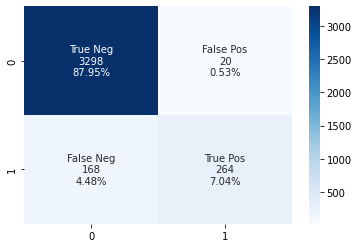

In [ ]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo.png")

In [ ]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower)/np.median(df_final_marzo_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))

Amplitud de Intervalo de Confianza: 15.783859
Porcentaje Intervalo de Confianza respecto y: 3.587736 
Cuánto de desvía el Intervalo de Confianza: 8.924707


# Primera Semana Marzo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Número de anomalías reales:  144


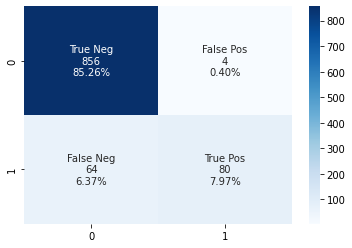

In [ ]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_primerasemana = df_final_final.loc['2022-03-01 00:50:00':'2022-03-08 00:00:00']
df_final_marzo_caso2_primerasemana["anomalia_detect"] = df_final_marzo_caso2_primerasemana.anomaly_score_y > 0.0
df_final_marzo_caso2_primerasemana

df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-08 00:00:00']
df_anom_real

df_final_marzo_caso2_primerasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_primerasemana[(df_final_marzo_caso2_primerasemana.anomalia_detect == 1) & (df_final_marzo_caso2_primerasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_primerasemana[(df_final_marzo_caso2_primerasemana.anomalia_detect == 0) & (df_final_marzo_caso2_primerasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_primerasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_primera_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())


# Segunda Semana Marzo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Número de anomalías reales:  144


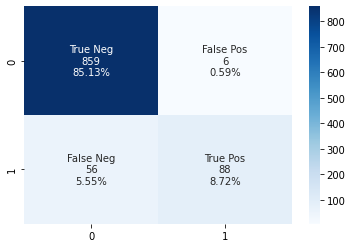

In [ ]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_segundasemana = df_final_final.loc['2022-03-08 00:00:00':'2022-03-15 00:00:00']
df_final_marzo_caso2_segundasemana["anomalia_detect"] = df_final_marzo_caso2_segundasemana.anomaly_score_y > 0.0
df_final_marzo_caso2_segundasemana

df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-08 00:00:00':'2022-03-15 00:00:00']
df_anom_real

df_final_marzo_caso2_segundasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_segundasemana[(df_final_marzo_caso2_segundasemana.anomalia_detect == 1) & (df_final_marzo_caso2_segundasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_segundasemana[(df_final_marzo_caso2_segundasemana.anomalia_detect == 0) & (df_final_marzo_caso2_segundasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_segundasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_segunda_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())

# Tercera Semana Marzo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Número de anomalías reales:  144


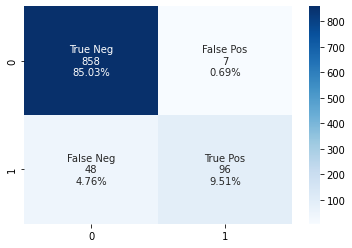

In [ ]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_tercerasemana = df_final_final.loc['2022-03-15 00:00:00':'2022-03-22 00:00:00']
df_final_marzo_caso2_tercerasemana["anomalia_detect"] = df_final_marzo_caso2_tercerasemana.anomaly_score_y > 0.0
df_final_marzo_caso2_tercerasemana

df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-15 00:00:00':'2022-03-22 00:00:00']
df_anom_real

df_final_marzo_caso2_tercerasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_tercerasemana[(df_final_marzo_caso2_tercerasemana.anomalia_detect == 1) & (df_final_marzo_caso2_tercerasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_tercerasemana[(df_final_marzo_caso2_tercerasemana.anomalia_detect == 0) & (df_final_marzo_caso2_tercerasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_tercerasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_tercera_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())

#CASO 2. JULIO

In [ ]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso2 = df_final_final.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_final_julio_caso2["anomalia_detect"] = df_final_julio_caso2.anomaly_score_y > 0.0
df_final_julio_caso2.to_csv("caso2_anomalias_julio.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_anom_real = pd.read_csv("/content/caso2_julio.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,17573,371.254843,370.004791,420.682833,319.326749,False,371.254843,False
2022-07-01 01:00:00,17574,383.898611,382.933563,433.611605,332.255521,False,383.898611,False
2022-07-01 01:10:00,17575,396.382666,395.597626,446.275668,344.919584,False,396.382666,False
2022-07-01 01:20:00,17576,408.683245,407.985962,458.664004,357.307920,False,408.683245,False
2022-07-01 01:30:00,17577,420.776931,420.093872,470.771914,369.415830,False,420.776931,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,22027,242.509813,238.903198,289.581240,188.225156,False,242.509813,False
2022-07-31 23:20:00,22028,255.408067,252.158203,302.836245,201.480161,False,255.408067,False
2022-07-31 23:30:00,22029,268.391208,265.616516,316.294558,214.938474,False,268.391208,False


In [ ]:
df_final_julio_caso2["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_julio_caso2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y,anomalia_detect,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,445.505812,lunes-anomalias,432.541576,443.516227,454.498467,0.0,False,False
2022-07-01 01:00:00,460.678333,lunes-anomalias,448.705910,459.556219,470.413890,0.0,False,False
2022-07-01 01:10:00,475.6592,lunes-anomalias,464.605043,475.353581,486.109294,0.0,False,False
2022-07-01 01:20:00,490.419894,lunes-anomalias,480.075629,490.688868,501.309065,0.0,False,False
2022-07-01 01:30:00,504.932317,lunes-anomalias,494.937220,505.357283,515.784024,0.0,False,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,242.509813,lunes-anomalias,213.674545,232.077316,250.512954,0.0,False,False
2022-07-31 23:20:00,255.408067,lunes-anomalias,223.256999,244.034067,264.856998,0.0,False,False
2022-07-31 23:30:00,268.391208,lunes-anomalias,238.832418,261.932210,285.089832,0.0,False,False


In [ ]:
fp = df_final_julio_caso2[(df_final_julio_caso2.anomalia_detect == 1) & (df_final_julio_caso2.anomalia_real == 0)]
fn = df_final_julio_caso2[(df_final_julio_caso2.anomalia_detect == 0) & (df_final_julio_caso2.anomalia_real == 1)]

In [ ]:
fp

,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y,anomalia_detect,anomalia_real
timestamp,,,,,,,,
2022-07-01 23:40:00,336.432954,lunes-anomalias,287.468130,304.594426,321.736304,0.069758,True,False
2022-07-01 23:50:00,352.124979,lunes-anomalias,295.098386,312.074798,329.066877,0.329495,True,False
2022-07-08 23:10:00,290.040547,lunes-anomalias,255.668280,271.789241,287.919155,0.026851,True,False
2022-07-08 23:20:00,305.511044,lunes-anomalias,266.773732,283.315535,299.867178,0.049714,True,False
2022-07-08 23:30:00,321.085268,lunes-anomalias,276.616223,293.463978,310.322036,0.080985,True,False
2022-07-08 23:40:00,336.73357,lunes-anomalias,285.215942,302.087484,318.969470,0.157416,True,False
2022-07-08 23:50:00,352.426164,lunes-anomalias,293.004156,309.607751,326.221640,0.217389,True,False
2022-07-15 23:20:00,305.808847,lunes-anomalias,267.756273,283.149938,298.556537,0.041731,True,False
2022-07-15 23:30:00,321.38477,lunes-anomalias,275.998492,291.762464,307.540115,0.094850,True,False


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_julio_caso2.index, y=df_final_julio_caso2["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso2.index, y=df_final_julio_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso2[df_final_julio_caso2["anomalia_real"]==True].index, y=df_final_julio_caso2[df_final_julio_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Julio_Serie_Temporal.svg")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_julio_caso2.index, y=df_final_julio_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso2[df_final_julio_caso2["anomalia_real"]==True].index, y=df_final_julio_caso2[df_final_julio_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Julio_Serie_Temporal_FN.svg")

In [ ]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso2.actual, df_final_julio_caso2.model_median))

Mean Absolute Error (MAE): 3.399113
Mean Squared Error (MSE): 56.235997
Root Mean Squared Error (RMSE): 7.499066


In [ ]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect))

Número de anomalías reales:  576
Número de anomalías detectadas:  28
Accuracy: 0.869029
F1-Score: 0.033113


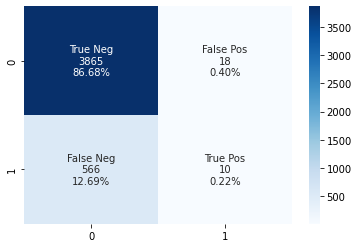

In [ ]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_julio.png")

In [ ]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower)/np.median(df_final_julio_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso2.model_upper-df_final_julio_caso2.model_lower))

Amplitud de Intervalo de Confianza: 22.551179
Porcentaje Intervalo de Confianza respecto y: 5.084111 
Cuánto de desvía el Intervalo de Confianza: 14.298764


In [ ]:
fp.index  

TypeError: ignored

In [ ]:
# Salvar a un excel
array = [df_final_julio_caso2.index, df_final_julio_caso2["actual"].values, df_final_julio_caso2["model_median"].values, df_final_julio_caso2["anomalia_real"].values, df_final_julio_caso2["anomalia_detect"].values]
#df = pd.DataFrame(array, columns=['ds','y_original','y_pred','anomalia_real','anomalia_pred','fp_np','fn_np','tp_np','tn_np'])
array
#df = pd.DataFrame(array, columns=['ds','y_original','y_pred','anomalia_real','anomalia_pred'])

[DatetimeIndex(['2022-07-01 00:50:00', '2022-07-01 01:00:00',
                '2022-07-01 01:10:00', '2022-07-01 01:20:00',
                '2022-07-01 01:30:00', '2022-07-01 01:40:00',
                '2022-07-01 01:50:00', '2022-07-01 02:00:00',
                '2022-07-01 02:10:00', '2022-07-01 02:20:00',
                ...
                '2022-07-31 22:20:00', '2022-07-31 22:30:00',
                '2022-07-31 22:40:00', '2022-07-31 22:50:00',
                '2022-07-31 23:00:00', '2022-07-31 23:10:00',
                '2022-07-31 23:20:00', '2022-07-31 23:30:00',
                '2022-07-31 23:40:00', '2022-07-31 23:50:00'],
               dtype='datetime64[ns]', name='timestamp', length=4459, freq=None),
 array([445.5058120701633, 460.6783329923779, 475.6591996940072, ...,
        268.39120759566754, 281.4345195404751, 294.51317327698507],
       dtype=object),
 array([443.51622731, 459.5562186 , 475.3535813 , ..., 261.9322105 ,
        288.57872808, 326.01498083]),
 array([Fa

## CASO 2 JULIO CON RUIDO

In [ ]:
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-caso2_ruido")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-06-30 00:00:00':'2022-08-01 00:00:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()
df_final["anomaly_score"] = 0
df_final_final = pd.merge(df_final, df_score, on='timestamp', how='left')
df_final_final = df_final_final.replace(np.nan, 0)
df_final_final = df_final_final.drop(columns=['anomaly_score_x'])
df_final_final
df_final_final = df_final_final.drop_duplicates()
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 2)
# Modificar fechas y nombres para caso
df_final_julio_caso2_ruido = df_final_final.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_final_julio_caso2_ruido["anomalia_detect"] = df_final_julio_caso2_ruido.anomaly_score_y > 0.0
df_final_julio_caso2_ruido.to_csv("caso2_anomalias_julio_ruido.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_anom_real = pd.read_csv("/content/caso2_julio.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-07-01 00:50:00':'2022-07-31 23:50:00']
df_anom_real

,Unnamed: 0,y,yhat1,upper,lower,anomalía,y_original,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,17573,371.254843,370.004791,420.682833,319.326749,False,371.254843,False
2022-07-01 01:00:00,17574,383.898611,382.933563,433.611605,332.255521,False,383.898611,False
2022-07-01 01:10:00,17575,396.382666,395.597626,446.275668,344.919584,False,396.382666,False
2022-07-01 01:20:00,17576,408.683245,407.985962,458.664004,357.307920,False,408.683245,False
2022-07-01 01:30:00,17577,420.776931,420.093872,470.771914,369.415830,False,420.776931,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,22027,242.509813,238.903198,289.581240,188.225156,False,242.509813,False
2022-07-31 23:20:00,22028,255.408067,252.158203,302.836245,201.480161,False,255.408067,False
2022-07-31 23:30:00,22029,268.391208,265.616516,316.294558,214.938474,False,268.391208,False


In [ ]:
df_final_julio_caso2_ruido["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_julio_caso2_ruido

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,actual,job_id,model_lower,model_median,model_upper,anomaly_score_y,anomalia_detect,anomalia_real
timestamp,,,,,,,,
2022-07-01 00:50:00,450.29628,caso2_ruido,431.797381,451.292069,470.833901,0.0,False,False
2022-07-01 01:00:00,464.315073,caso2_ruido,445.892484,463.336363,480.818829,0.0,False,False
2022-07-01 01:10:00,469.613228,caso2_ruido,459.312463,475.543980,491.809893,0.0,False,False
2022-07-01 01:20:00,494.655494,caso2_ruido,472.419766,488.200160,504.013033,0.0,False,False
2022-07-01 01:30:00,497.697319,caso2_ruido,485.744559,501.138300,516.563312,0.0,False,False
...,...,...,...,...,...,...,...,...
2022-07-31 23:10:00,238.997181,caso2_ruido,161.615373,245.883049,330.150724,0.0,False,False
2022-07-31 23:20:00,254.754743,caso2_ruido,173.856841,265.465592,357.074342,0.0,False,False
2022-07-31 23:30:00,268.035501,caso2_ruido,199.170408,296.691726,394.213045,0.0,False,False


In [ ]:
fp = df_final_julio_caso2_ruido[(df_final_julio_caso2_ruido.anomalia_detect == 1) & (df_final_julio_caso2_ruido.anomalia_real == 0)]
fn = df_final_julio_caso2_ruido[(df_final_julio_caso2_ruido.anomalia_detect == 0) & (df_final_julio_caso2_ruido.anomalia_real == 1)]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_julio_caso2_ruido.index, y=df_final_julio_caso2_ruido["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso2_ruido.index, y=df_final_julio_caso2_ruido["actual"],
                    mode='lines',
                    name='Valores Actuales'))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.add_trace(go.Scatter(x=df_final_julio_caso2_ruido[df_final_julio_caso2_ruido["anomalia_real"]==True].index, y=df_final_julio_caso2_ruido[df_final_julio_caso2_ruido["anomalia_real"]==True].actual,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.show()

In [ ]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_julio_caso2_ruido.actual, df_final_julio_caso2_ruido.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_julio_caso2_ruido.actual, df_final_julio_caso2_ruido.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_julio_caso2_ruido.actual, df_final_julio_caso2_ruido.model_median))

Mean Absolute Error (MAE): 8.382317
Mean Squared Error (MSE): 182.069688
Root Mean Squared Error (RMSE): 13.493320


In [ ]:
#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_julio_caso2_ruido.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_julio_caso2_ruido.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_julio_caso2_ruido.anomalia_detect))

Número de anomalías reales:  576
Número de anomalías detectadas:  106
Accuracy: 0.861404
F1-Score: 0.093842


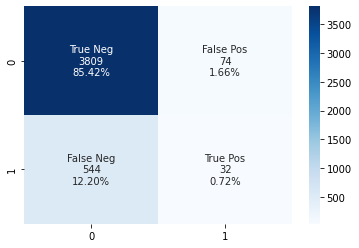

In [ ]:
cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_julio_caso2_ruido.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_julio_ruido.png")

In [ ]:
print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_julio_caso2_ruido.model_upper-df_final_julio_caso2_ruido.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_julio_caso2_ruido.model_upper-df_final_julio_caso2_ruido.model_lower)/np.median(df_final_julio_caso2_ruido.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_julio_caso2_ruido.model_upper-df_final_julio_caso2_ruido.model_lower))

Amplitud de Intervalo de Confianza: 43.452417
Porcentaje Intervalo de Confianza respecto y: 9.550508 
Cuánto de desvía el Intervalo de Confianza: 27.741676


# MARZO CASO 2

In [44]:
from datetime import timedelta
import elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import certifi
import eland as ed
from datetime import datetime
import pandas as pd
import numpy as np

# Password for the 'elastic' user generated by Elasticsearch
ELASTIC_PASSWORD = "9QJVpAsI1dfU33vZpc072VTd"

# Found in the 'Manage Deployment' page
CLOUD_ID = "SeriestemporalesElastic:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQxMmRiODkwZjhhN2U0YTVjOTAwMDViODMyZjhlYWViNCRjMmU4YmQxYjkzZTI0MGY5OTZiYzIyNTFkZGMxMGY4Yg=="

# Create the client instance
client = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
client.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

es=client
#df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
df = ed.DataFrame(es, es_index_pattern=".ml-anomalies-lunes-anomalias")
columns = ["actual", "job_id", "model_lower", "model_median", "model_upper", "timestamp"]
df_clean = df[columns]
df_clean = ed.eland_to_pandas(df_clean)
df_clean

# Procesado
df_clean = df_clean.dropna()
df_clean["fecha"] = pd.to_datetime(df_clean["timestamp"])
df_clean.set_index('timestamp', inplace=True)
df_clean
df_clean = df_clean.drop(["fecha"], axis=1)
df_clean = df_clean.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_clean = df_clean.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
columns2 = ["anomaly_score", "timestamp"]
df_score = df[columns2]
df_score = ed.eland_to_pandas(df_score)
df_score = df_score.dropna()
df_score
df_score["fecha"] = pd.to_datetime(df_score["timestamp"])
df_score.set_index('timestamp', inplace=True)
df_score
df_score = df_score.drop(["fecha"], axis=1)
df_score = df_score.sort_values(by="timestamp", ascending=True)
# Modificar fechas
df_score = df_score.loc['2022-02-28 00:00:00':'2022-03-27 01:50:00']
df_score = df_score.drop_duplicates()
df_final = df_clean.copy()


In [45]:
df_final_final = df_final.copy()

In [46]:
# Modificar la hora para julio +2, para marzo +1
df_final_final.index = df_final_final.index + timedelta(hours = 1)
# Modificar fechas y nombres para caso
df_final_marzo_caso2 = df_final_final.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']

In [47]:
df_final_marzo_caso2

,actual,job_id,model_lower,model_median,model_upper
timestamp,,,,,
2022-03-01 00:50:00,440.396715,lunes-anomalias,433.425448,442.634962,451.844476
2022-03-01 01:00:00,455.626872,lunes-anomalias,449.594674,458.196582,466.798490
2022-03-01 01:10:00,470.67499,lunes-anomalias,464.969027,472.921218,480.873409
2022-03-01 01:20:00,485.512425,lunes-anomalias,479.581313,487.065118,494.548924
2022-03-01 01:30:00,500.11093,lunes-anomalias,493.618512,500.837492,508.056471
...,...,...,...,...,...
2022-03-27 01:10:00,393.116007,lunes-anomalias,385.876168,392.498237,399.243739
2022-03-27 01:20:00,405.467127,lunes-anomalias,398.671503,405.246510,411.942710
2022-03-27 01:30:00,417.617477,lunes-anomalias,411.104333,417.811895,424.644949


In [48]:
df_final_marzo_caso2["anomalia_detect"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_final_marzo_caso2

,actual,job_id,model_lower,model_median,model_upper,anomalia_detect
timestamp,,,,,,
2022-03-01 00:50:00,440.396715,lunes-anomalias,433.425448,442.634962,451.844476,0
2022-03-01 01:00:00,455.626872,lunes-anomalias,449.594674,458.196582,466.798490,0
2022-03-01 01:10:00,470.67499,lunes-anomalias,464.969027,472.921218,480.873409,0
2022-03-01 01:20:00,485.512425,lunes-anomalias,479.581313,487.065118,494.548924,0
2022-03-01 01:30:00,500.11093,lunes-anomalias,493.618512,500.837492,508.056471,0
...,...,...,...,...,...,...
2022-03-27 01:10:00,393.116007,lunes-anomalias,385.876168,392.498237,399.243739,0
2022-03-27 01:20:00,405.467127,lunes-anomalias,398.671503,405.246510,411.942710,0
2022-03-27 01:30:00,417.617477,lunes-anomalias,411.104333,417.811895,424.644949,0


In [91]:
df_final_marzo_caso2.loc[(df_final_marzo_caso2.index > "2022-03-07 00:00:00") & (df_final_marzo_caso2.index < "2022-03-08 00:40:00"),'anomalia_detect']

timestamp
2022-03-07 00:10:00    1
2022-03-07 00:20:00    1
2022-03-07 00:30:00    1
2022-03-07 00:40:00    1
2022-03-07 00:50:00    1
                      ..
2022-03-07 23:50:00    1
2022-03-08 00:00:00    1
2022-03-08 00:10:00    1
2022-03-08 00:20:00    1
2022-03-08 00:30:00    1
Name: anomalia_detect, Length: 147, dtype: int64

In [103]:
df_final_marzo_caso2.loc[(df_final_marzo_caso2.index > "2022-03-20 23:50:00") & (df_final_marzo_caso2.index < "2022-03-22 00:10:00"),'anomalia_detect'] = 1

In [108]:
df_final_marzo_caso2.loc[(df_final_marzo_caso2.index == "2022-03-25 18:20:00"),'anomalia_detect'] = 1

In [114]:
df_final_marzo_caso2

,actual,job_id,model_lower,model_median,model_upper,anomalia_detect
timestamp,,,,,,
2022-03-01 00:50:00,440.396715,lunes-anomalias,433.425448,442.634962,451.844476,0
2022-03-01 01:00:00,455.626872,lunes-anomalias,449.594674,458.196582,466.798490,0
2022-03-01 01:10:00,470.67499,lunes-anomalias,464.969027,472.921218,480.873409,0
2022-03-01 01:20:00,485.512425,lunes-anomalias,479.581313,487.065118,494.548924,0
2022-03-01 01:30:00,500.11093,lunes-anomalias,493.618512,500.837492,508.056471,0
...,...,...,...,...,...,...
2022-03-27 01:10:00,393.116007,lunes-anomalias,385.876168,392.498237,399.243739,0
2022-03-27 01:20:00,405.467127,lunes-anomalias,398.671503,405.246510,411.942710,0
2022-03-27 01:30:00,417.617477,lunes-anomalias,411.104333,417.811895,424.644949,0


In [112]:
df_final_marzo_caso2.to_csv("caso2_anomalias_marzo.csv")

In [115]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-27 01:50:00']
df_anom_real
df_final_marzo_caso2["anomalia_real"] = df_anom_real["anomalia_real"].values
df_final_marzo_caso2
fp = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 1) & (df_final_marzo_caso2.anomalia_real == 0)]
fn = df_final_marzo_caso2[(df_final_marzo_caso2.anomalia_detect == 0) & (df_final_marzo_caso2.anomalia_real == 1)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["model_median"],
                    mode='markers',
                    name='Elastic',
                    marker = {'color' : 'orange'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].index, y=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Marzo_Serie_Temporal.svg")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final_marzo_caso2.index, y=df_final_marzo_caso2["actual"],
                    mode='lines',
                    name='Valores Actuales',
                    marker = {'color' : 'black'}))
fig.add_trace(go.Scatter(x=fp.index, y=fp["model_median"],
                    mode='markers',
                    name='Falsos positivos',
                    marker = {'color' : 'blue'}))
fig.add_trace(go.Scatter(x=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].index, y=df_final_marzo_caso2[df_final_marzo_caso2["anomalia_real"]==True].model_median,
                    mode='markers',
                    name='Anomalias',
                    marker = {'color' : 'red'}))
fig.add_trace(go.Scatter(x=fn.index, y=fn["model_median"],
                    mode='markers',
                    name='Falsos Negativos',
                    marker = {'color' : 'green'}))
fig.show()
fig.write_image("Caso2_Marzo_Serie_Temporal_FN.svg")

Mean Absolute Error (MAE): 20.042282
Mean Squared Error (MSE): 4696.773952
Root Mean Squared Error (RMSE): 68.533014
Número de anomalías reales:  432
Número de anomalías detectadas:  454
Accuracy: 0.994135
F1-Score: 0.975169
Amplitud de Intervalo de Confianza: 15.783344
Porcentaje Intervalo de Confianza respecto y: 3.585443 
Cuánto de desvía el Intervalo de Confianza: 8.923573


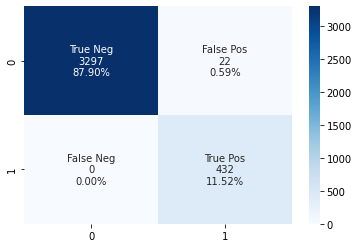

In [117]:
#### Regression Metrics
print("Mean Absolute Error (MAE): %4f" %mean_absolute_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Mean Squared Error (MSE): %4f" %mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))
print("Root Mean Squared Error (RMSE): %4f" %root_mean_squared_error(df_final_marzo_caso2.actual, df_final_marzo_caso2.model_median))

#### Classification Metrics
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())
print("Número de anomalías detectadas: ", df_final_marzo_caso2.anomalia_detect.sum())
print("Accuracy: %4f" %accuracy_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))
print("F1-Score: %4f" %f1_score(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect))

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo.png")

print("Amplitud de Intervalo de Confianza: %4f" %np.mean(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))
print("Porcentaje Intervalo de Confianza respecto y: %4f " %(np.median(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower)/np.median(df_final_marzo_caso2.model_median)*100))
print("Cuánto de desvía el Intervalo de Confianza: %4f" %np.std(df_final_marzo_caso2.model_upper-df_final_marzo_caso2.model_lower))

# Primera Semana

In [118]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_primerasemana = df_final_marzo_caso2.copy()
df_final_marzo_caso2_primerasemana = df_final_marzo_caso2_primerasemana.loc['2022-03-01 00:50:00':'2022-03-08 00:00:00']

Número de anomalías reales:  144


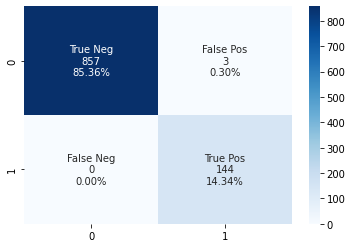

In [119]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-01 00:50:00':'2022-03-08 00:00:00']
df_anom_real

df_final_marzo_caso2_primerasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_primerasemana[(df_final_marzo_caso2_primerasemana.anomalia_detect == 1) & (df_final_marzo_caso2_primerasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_primerasemana[(df_final_marzo_caso2_primerasemana.anomalia_detect == 0) & (df_final_marzo_caso2_primerasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_primerasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_primera_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())

# Segunda Semana

In [120]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_segundasemana = df_final_marzo_caso2.copy()
df_final_marzo_caso2_segundasemana = df_final_marzo_caso2_segundasemana.loc['2022-03-08 00:00:00':'2022-03-15 00:00:00']

Número de anomalías reales:  144


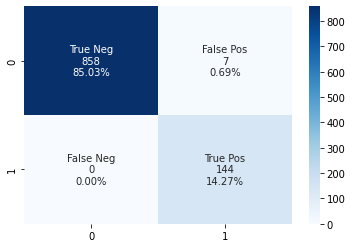

In [121]:
df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-08 00:00:00':'2022-03-15 00:00:00']
df_anom_real

df_final_marzo_caso2_segundasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_segundasemana[(df_final_marzo_caso2_segundasemana.anomalia_detect == 1) & (df_final_marzo_caso2_segundasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_segundasemana[(df_final_marzo_caso2_segundasemana.anomalia_detect == 0) & (df_final_marzo_caso2_segundasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_segundasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_segunda_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())

# Tercera Semana

Número de anomalías reales:  144


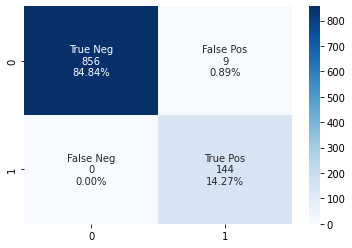

In [122]:
# Modificar fechas y nombres para caso
df_final_marzo_caso2_tercerasemana = df_final_marzo_caso2.copy()
df_final_marzo_caso2_tercerasemana = df_final_marzo_caso2_tercerasemana.loc['2022-03-15 00:00:00':'2022-03-22 00:00:00']

df_anom_real = pd.read_csv("/content/caso2_marzo.csv", index_col="ds")
df_anom_real.index.names = ['timestamp']
df_anom_real = df_anom_real.loc['2022-03-15 00:00:00':'2022-03-22 00:00:00']
df_anom_real

df_final_marzo_caso2_tercerasemana["anomalia_real"] = df_anom_real["anomalia_real"].values


fp = df_final_marzo_caso2_tercerasemana[(df_final_marzo_caso2_tercerasemana.anomalia_detect == 1) & (df_final_marzo_caso2_tercerasemana.anomalia_real == 0)]
fn = df_final_marzo_caso2_tercerasemana[(df_final_marzo_caso2_tercerasemana.anomalia_detect == 0) & (df_final_marzo_caso2_tercerasemana.anomalia_real == 1)]

cf_matrix=confusion_matrix(df_anom_real.anomalia_real, df_final_marzo_caso2_tercerasemana.anomalia_detect)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.savefig("confussion_matrix_caso2_marzo_tercera_semana.png")
print("Número de anomalías reales: ", df_anom_real.anomalia_real.sum())